In [1]:
import pandas as pd
import numpy as np

f = open('D:/研究生/oldenburg_temp3.csv')
df = pd.read_csv(f, usecols=['id', 'time', 'x', 'y'])
df.sort_values(by=['id','time'],ascending= (True, True), inplace=True)
counts = dict(df['id'].value_counts())#统计第0列元素的值的个数
aa = [k for k,v in counts.items() if v<20 ]
for key in aa:
    df = df[~(df['id'].isin([key]))]
for i in range(20,31):
    df = df[~(df['time'].isin([i]))]
df = df.reset_index(drop = True)
counts1 = dict(df['time'].value_counts())#统计第0列元素的值的个数
print(counts1)

{15: 958, 14: 958, 16: 958, 1: 958, 17: 958, 2: 958, 18: 958, 3: 958, 19: 958, 4: 958, 5: 958, 6: 958, 7: 958, 8: 958, 9: 958, 10: 958, 11: 958, 12: 958, 13: 958, 0: 958}


In [2]:
df = df.values
a = df.reshape(958, 20, 4)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
labels = np.zeros(shape=(958,20))
labels.dtype = 'int64'
cluster_centers = np.zeros(shape=(20,40))
for i in range(20):
    #print(i)
    clf = KMeans(n_clusters=20, random_state=9)
    y_pred =  clf.fit_predict(a[:, i, 2:4])
    labels[:, i] = clf.labels_
    cluster_centers[:, 2*i:(2*i+2)] = clf.cluster_centers_
#对应的泛化轨迹
newpaths = []
for i in range(958):
    newpath = ""
    for j in range(20):
        string = "L"+ str(labels[i, j])
        newpath += string 
    newpaths.append(newpath)
# print(newpaths)

In [3]:
from collections import Counter
from numpy import *
result = Counter(newpaths)
newpathsdict = dict(result)
u = mean(list(newpathsdict.values()))

# print(newpathsdict,u)
import random
#随机生成轨迹补足数量
while(len(newpathsdict)<958):
    key = ""
    for i in range(10):
        string = "L" + str(random.randint(0,19))
        key += string
    newpathsdict.setdefault(key, 0)

In [4]:
values = list(newpathsdict.values())
print(values)

[1, 9, 1, 1, 2, 2, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 2, 1, 15, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2, 10, 1, 2, 1, 2, 17, 1, 2, 9, 1, 2, 2, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 9, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
import pywt
import math
import numpy as np

a = int(math.log(len(values), 2))
for index in range(int(math.pow(2,a+1))-len(values)):
    values.append(0)
print(len(values))

# 构建haar树    
def haarWaveletTransform(data):
    coeffs = pywt.dwt(data, 'haar')
    # (cA, cD) : tuple   Approximation and detail coefficients.
    cA, cD = coeffs
    cA /= math.sqrt(2)
    cD /= math.sqrt(2)
    return cA,cD


def buildHaarTreeList(data):
    haarTreeList = []
    while(len(data)>=2):
        cA,cD = haarWaveletTransform(data)
        cD = cD.tolist()
        cD.reverse()
        # print(cA, cD)
        haarTreeList.extend(cD)
        data = cA
        if(len(data) == 1):
            cA = cA.tolist()
            cA.reverse()
            haarTreeList.extend(cA)
    haarTreeList.reverse()
    return haarTreeList

# 重建
def rebuildHaarTreeList(list):
    n = int(math.log(len(list), 2))
    # print(n)
    cA = list[0:1]
    for i in range(n):
        cD = list[int(math.pow(2,i)):int(math.pow(2,i+1))]
        data = math.sqrt(2) * pywt.idwt(cA, cD, 'haar')
        cA = data
    return data

# 添加噪声
def addNoise(n, eps):
    laplaceNoise = []
    h = int(math.log(n, 2))
    i=0
    while(i<n):
        if(i==0):
            layernumber = 0
        else:
            layernumber = int(math.log(i, 2))
        noise = np.random.laplace(0, (1)/ (eps * int(math.pow(2, h - layernumber))))
        laplaceNoise.append(noise)
        i = i+1
    return laplaceNoise

temp = buildHaarTreeList(values)
n = len(temp)
noise = addNoise(n, 0.5)
c = [temp[i] + noise[i] for i in range(len(temp))]
noisecounts = rebuildHaarTreeList(c)
print(noisecounts)
print(len(noisecounts))

1024
[-0.33715245  9.58426713 -1.58417167 ... -0.96552408 -0.51018371
  1.22450234]
1024


In [6]:
import copy
# plan B 添加噪声
i = 0
newpathsdict2 = copy.deepcopy(newpathsdict);
for key,value in newpathsdict.items():
    newpathsdict[key] = noisecounts[i]
    i = i+1
print(newpathsdict.values())

dict_values([-0.3371524535303124, 9.584267129454883, -1.5841716737236253, 2.4798498743527198, 6.788609413185942, 0.48328728474669613, 3.021359956246086, -0.22638668287339375, 1.578853643064743, 1.4450058344758712, 4.300842228812545, 2.6443392130560843, -0.8655413938927633, 2.627470149401248, 5.598634582691687, -4.2841039683344775, 3.2894642039458066, 2.2851423281399392, 13.464949276057084, -0.4279595731922093, 0.6208175654785455, 7.992964292265868, 1.7259259470160555, 0.6131804349945051, 0.9927677545199883, 2.286181589428175, -0.2903741942807693, 1.2814973998912673, -0.5138698374624364, 1.9881385844937658, 1.7477375542901588, 2.393592303189539, -1.3786982545153588, 1.636709756473937, 0.1829151288325163, 1.9067065742547198, 2.994753126881005, 0.03329378321389682, 2.584942622832045, -0.1671092154580274, 1.4211345456903228, 1.39544058520283, 3.578357305238878, -1.3850302022083845, 0.3619814818023304, 0.7880555255227143, 0.8503928691541467, 3.641872373883822, 0.7791846551699071, -0.8851645

In [7]:
# dict按value排序得到两个list
def list_sort_by_value(d):
    items=d.items()
    backitems=[[v[1],v[0]] for v in items]
    backitems.sort(reverse=True)
    return [ backitems[i][1] for i in range(0,len(backitems))]
valueslist = sorted(list(newpathsdict.values()),reverse=True)
newpathslist = list_sort_by_value(newpathsdict)
print(newpathslist,valueslist)

['L8L5L19L6L1L6L5L4L11L10L6L6L1L8L6L6L4L9L4L10', 'L19L15L1L19L10L9L16L8L15L7L7L16L7L1L2L9L10L14L9L8', 'L12L17L18L7L19L2L6L14L8L15L15L8L11L7L16L10L6L1L8L18', 'L12L17L12L7L16L19L6L14L8L15L15L8L11L7L16L10L6L1L8L18', 'L2L3L4L9L4L8L12L13L4L2L5L11L3L2L4L4L2L7L13L4', 'L2L3L4L9L4L8L12L13L4L2L5L11L3L2L4L4L2L7L10L4', 'L11L8L13L15L12L13L7L15L13L5L3L10L18L4L9L1L14L2L7L16', 'L12L17L12L7L16L19L2L1L10L15L17L2L11L7L16L4L2L12L10L19', 'L12L3L4L9L4L8L12L13L4L2L5L11L3L2L4L4L2L7L13L4', 'L15L7L15L17L13L16L14L7L17L12L13L5L10L13L10L8L12L8L19L6', 'L3L19L9L1L5L11L11L12L18L18L14L14L12L12L12L7L17L0L11L1', 'L5L13L3L8L8L3L4L17L6L17L10L7L19L11L3L2L1L5L15L7', 'L12L17L12L7L16L19L2L1L10L2L17L2L13L5L14L18L8L12L2L19', 'L18L6L10L11L3L1L13L0L6L3L10L7L19L11L3L2L1L5L15L7', 'L13L16L7L14L1L18L9L4L5L13L8L13L9L17L8L12L15L13L16L0', 'L7L18L6L5L7L5L3L5L1L6L19L12L16L14L11L15L19L10L5L3', 'L7L19L19L4L11L6L8L4L5L19', 'L19L2L12L5L10L18L12L1L17L3', 'L12L17L18L7L19L2L6L14L8L15L15L11L3L2L4L4L2L7L10L4', 'L2L3L4L9L4L8L12L13L4L2L5L11L3L2L16L4

In [8]:
truecount = []
for item in newpathslist:
    truecount.append(newpathsdict2.get(item))
print(truecount)

[17, 15, 10, 9, 9, 4, 9, 1, 4, 9, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 4, 2, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 4, 3, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 3, 1, 0, 1, 1, 2, 1, 1, 4, 1, 0, 1, 0, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from sklearn.isotonic import IsotonicRegression
x = np.arange(958)
y = np.array(truecount)
y_ = IsotonicRegression(increasing=False).fit_transform(x,y)
print(y_)

[17.         15.         10.          9.          9.          6.5
  6.5         4.66666667  4.66666667  4.66666667  2.          1.5
  1.5         1.5         1.5         1.5         1.5         1.5
  1.5         1.5         1.5         1.5         1.5         1.5
  1.5         1.5         1.5         1.5         1.5         1.5
  1.5         1.5         1.5         1.5         1.5         1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453125    1.453125    1.453125    1.453125
  1.453125    1.453125    1.453

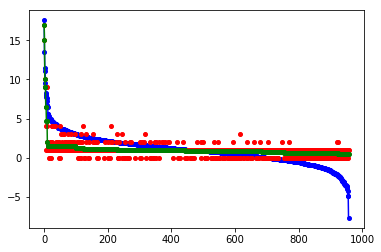

In [10]:
import matplotlib.pyplot as plt
a = np.array(valueslist)
plt.plot(x,a,"b.-",markersize=8)
plt.plot(x,y,"r.",markersize=8)
plt.plot(x,y_,"g.-",markersize=8)
plt.show()

In [11]:
from sklearn import metrics
result_NMI=metrics.normalized_mutual_info_score(y_, y)
print(result_NMI)

0.11221550081436422


D:\Anaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
